In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression

In [2]:
raw_data = pd.read_csv('train.csv')
raw_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
raw_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
 raw_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
raw_data = raw_data.drop(columns=['PassengerId', 'Name', 'Cabin', 'Fare'])
raw_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Embarked
0,0,3,male,22.0,1,0,A/5 21171,S
1,1,1,female,38.0,1,0,PC 17599,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,S
3,1,1,female,35.0,1,0,113803,S
4,0,3,male,35.0,0,0,373450,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,S
887,1,1,female,19.0,0,0,112053,S
888,0,3,female,NaN,1,2,W./C. 6607,S
889,1,1,male,26.0,0,0,111369,C


In [6]:
raw_data['Sex'] = raw_data['Sex'].map({'male':1, 'female':0})
raw_data['Embarked'] = raw_data['Embarked'].map({'S':0, 'C':1, 'Q':2})

In [7]:
raw_data['Ticket'] = pd.to_numeric(raw_data.iloc[:,-2], errors='ignore')

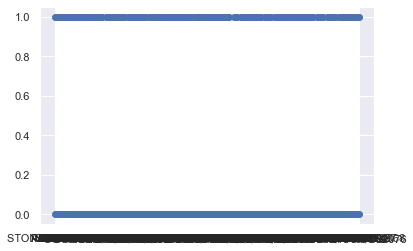

In [8]:
plt.scatter(raw_data['Ticket'], raw_data['Survived'])
plt.show()

In [9]:
raw_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Embarked
0,0,3,1,22.0,1,0,A/5 21171,0.0
1,1,1,0,38.0,1,0,PC 17599,1.0
2,1,3,0,26.0,0,0,STON/O2. 3101282,0.0
3,1,1,0,35.0,1,0,113803,0.0
4,0,3,1,35.0,0,0,373450,0.0


In [10]:
raw_data['Embarked'].unique()

array([ 0.,  1.,  2., nan])

### Dealing with msiing data

In [11]:
def missing_percentage(df):
    nan_percent = 100*(raw_data.isnull().sum()/len(raw_data))
    nan_percent = nan_percent[nan_percent>0].sort_values()
    return nan_percent

In [12]:
missing_percentage(raw_data)

Embarked     0.224467
Age         19.865320
dtype: float64

In [13]:
raw_data['Age'].isnull().sum()

177

In [14]:
raw_data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [15]:
raw_data['Age'].mean()

29.69911764705882

In [16]:
import math
female_mean, male_mean = raw_data.groupby('Sex')['Age'].mean()
def fill_age (age, sex):
    if math.isnan(age):
        if sex == 'male':
            return male_mean
        else:
            return female_mean
    else:
        return age

In [17]:
raw_data['Age'] = raw_data.apply(lambda row: fill_age(row['Age'], row['Sex']), axis=1)

In [18]:
raw_data['Age'].isnull().sum()

0

In [19]:
raw_data['Embarked'].isnull().sum()

2

In [20]:
raw_data = raw_data.dropna()
raw_data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Embarked
0,0,3,1,22.000000,1,0,A/5 21171,0.0
1,1,1,0,38.000000,1,0,PC 17599,1.0
2,1,3,0,26.000000,0,0,STON/O2. 3101282,0.0
3,1,1,0,35.000000,1,0,113803,0.0
4,0,3,1,35.000000,0,0,373450,0.0
5,0,3,1,27.915709,0,0,330877,2.0
6,0,1,1,54.000000,0,0,17463,0.0
7,0,3,1,2.000000,3,1,349909,0.0
8,1,3,0,27.000000,0,2,347742,0.0
9,1,2,0,14.000000,1,0,237736,1.0


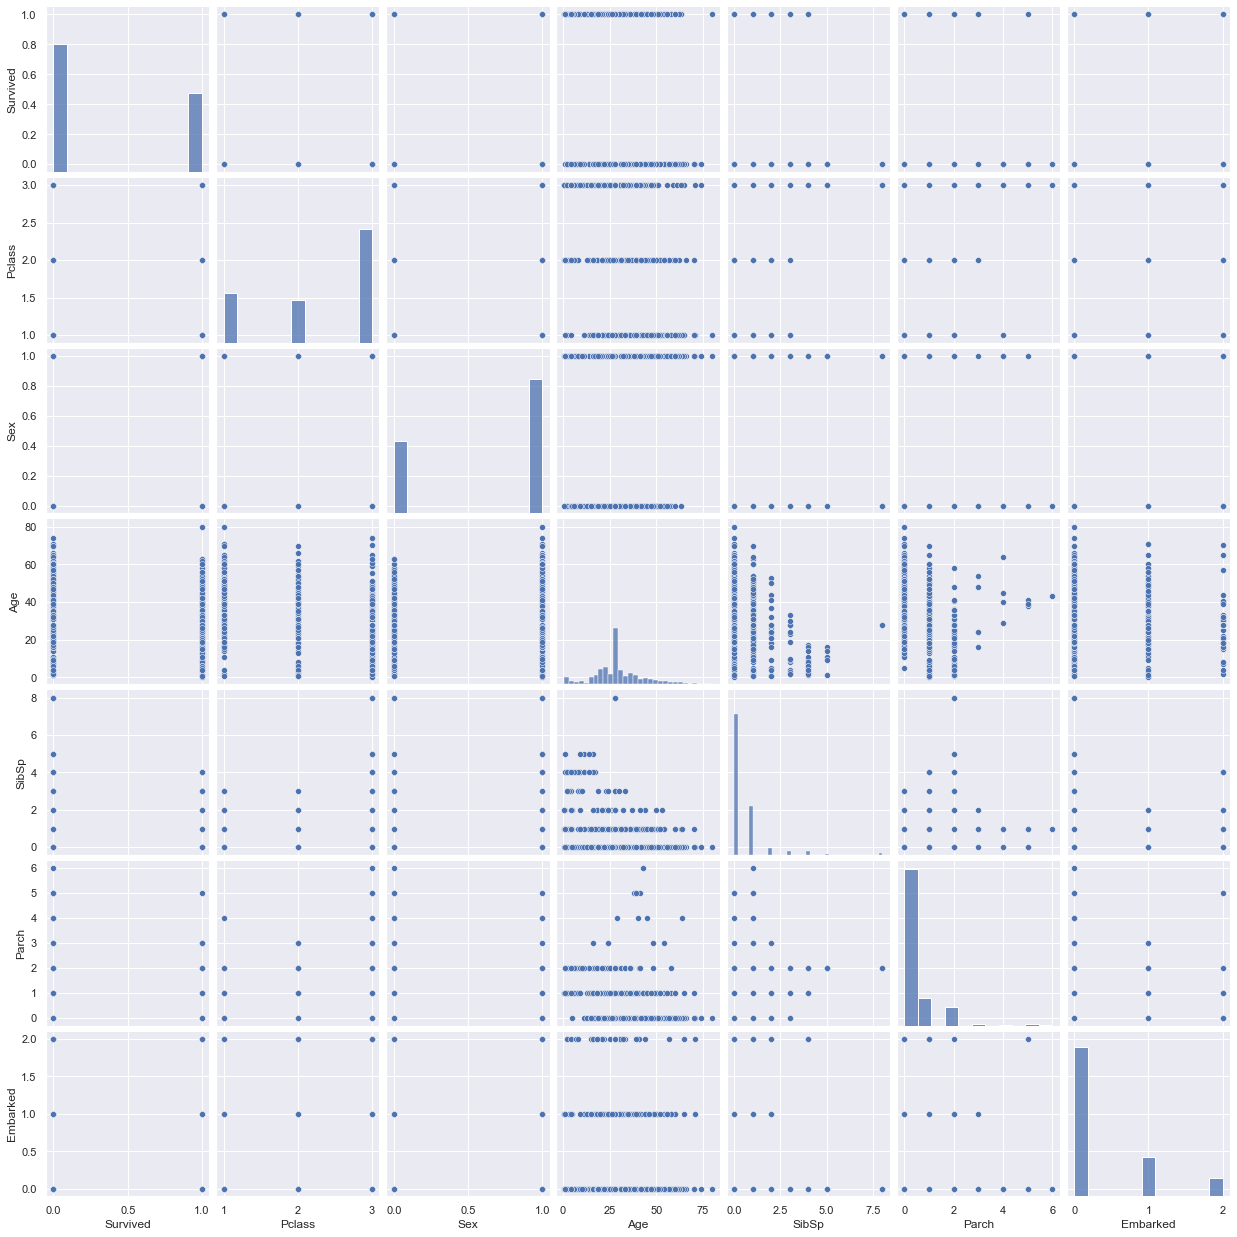

In [21]:
sns.pairplot(raw_data)

In [22]:
X = raw_data.drop(columns=['Survived', 'Ticket'])
y = raw_data['Survived']

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8)

In [24]:
scaler = StandardScaler()

In [25]:
scaler.fit(X_train)

StandardScaler()

In [26]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
model = LogisticRegression()

In [28]:
model.fit(X_train,y_train)

LogisticRegression()

In [29]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0])

In [30]:
model.score(X_train,y_train)

0.8045007032348804

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix

In [32]:
confusion_matrix(y_test,y_pred)

array([[85, 21],
       [23, 49]])

In [33]:
accuracy_score(y_test, y_pred)

0.7528089887640449

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.80      0.79       106
           1       0.70      0.68      0.69        72

    accuracy                           0.75       178
   macro avg       0.74      0.74      0.74       178
weighted avg       0.75      0.75      0.75       178



### KNN Method

In [35]:
from sklearn.neighbors import KNeighborsClassifier
test_error_rate = []

for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    
    y_pred_knn = knn.predict(X_test)
    
    e = 1 - accuracy_score(y_test, y_pred_knn)
    test_error_rate.append(e)

In [36]:
test_error_rate

[0.2640449438202247,
 0.2247191011235955,
 0.2134831460674157,
 0.202247191011236,
 0.2134831460674157,
 0.202247191011236,
 0.2134831460674157,
 0.1853932584269663,
 0.2303370786516854,
 0.2078651685393258,
 0.202247191011236,
 0.1910112359550562,
 0.2078651685393258,
 0.202247191011236,
 0.2078651685393258,
 0.1910112359550562,
 0.2078651685393258,
 0.202247191011236,
 0.2078651685393258,
 0.1966292134831461,
 0.202247191011236,
 0.1910112359550562,
 0.2134831460674157,
 0.1966292134831461,
 0.2191011235955056,
 0.202247191011236,
 0.2134831460674157,
 0.202247191011236,
 0.2191011235955056]

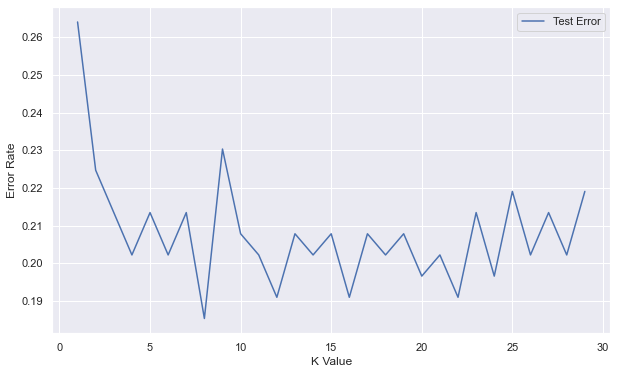

In [37]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30), test_error_rate, label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel('K Value')
plt.show()

In [38]:
knn_model_7 = KNeighborsClassifier(n_neighbors=7)
knn_model_7.fit(X_train,y_train)
y_knn_pred_7 = knn_model_7.predict(X_test)

In [39]:
knn_model_15 = KNeighborsClassifier(n_neighbors=15)
knn_model_15.fit(X_train,y_train)
y_knn_pred_15 = knn_model_15.predict(X_test)

In [40]:
print(classification_report(y_test, y_knn_pred_7))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       106
           1       0.78      0.65      0.71        72

    accuracy                           0.79       178
   macro avg       0.79      0.77      0.77       178
weighted avg       0.79      0.79      0.78       178



In [41]:
print(classification_report(y_test,y_knn_pred_15))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       106
           1       0.79      0.67      0.72        72

    accuracy                           0.79       178
   macro avg       0.79      0.77      0.78       178
weighted avg       0.79      0.79      0.79       178



### Testing The Model

In [42]:
model.score(X_test, y_test)

0.7528089887640449

In [43]:
predicted_proba = model.predict_proba(X_test)
predicted_proba

array([[0.50776745, 0.49223255],
       [0.44538866, 0.55461134],
       [0.75502804, 0.24497196],
       [0.868196  , 0.131804  ],
       [0.94424406, 0.05575594],
       [0.48577393, 0.51422607],
       [0.36504193, 0.63495807],
       [0.17300119, 0.82699881],
       [0.73143574, 0.26856426],
       [0.83396963, 0.16603037],
       [0.03150037, 0.96849963],
       [0.08417762, 0.91582238],
       [0.27834431, 0.72165569],
       [0.17629549, 0.82370451],
       [0.89198131, 0.10801869],
       [0.95059791, 0.04940209],
       [0.61812579, 0.38187421],
       [0.90488335, 0.09511665],
       [0.90488335, 0.09511665],
       [0.20755886, 0.79244114],
       [0.71493163, 0.28506837],
       [0.33486278, 0.66513722],
       [0.06305918, 0.93694082],
       [0.84828544, 0.15171456],
       [0.75580518, 0.24419482],
       [0.61355262, 0.38644738],
       [0.75942012, 0.24057988],
       [0.4385084 , 0.5614916 ],
       [0.16718153, 0.83281847],
       [0.66050519, 0.33949481],
       [0.

In [44]:
import pickle

with open('model','wb')as file:
    pickle.dump(model, file)
    
with open('scaler', 'wb') as file:
    pickle.dump(scaler, file)